# Curso Profesional de Scikt-learn

Scikit-learn comienza su historia en 2007 por David Cournapeau como un proyecto dentro del Google Summer of Code. Matthieu Brucher continúa como parte de su tesis.

- La versión estable actual es la v0.22.
- Curva de aprendizaje suave.
- Es una libreria muy versátil.
- Comunidad de soporte.
- Usado en producción.
- Integración con librerias externas.


## Módulos de Sckit-learn

1. Clasificación
2. Regresión
3. Clustering
4. Preprocesamiento
5. Reducción de la dimensionalidad
6. Selección del modelo

## Tipos de Aprendizaje de maquina
1. **Aprendizaje Supervisado (por observación)**: De nuestros datos se puede inferir directamente.
2. **Aprendizaje por Refuerzo (prueba y error)**: No tenemos información precisa sobre lo que esperamos pero sí podemos evaluar si una decisión tomada por la máquina es buena o mala.
3. **Aprendizaje No Supervisado (por descubrimiento)**: No sabemos qué esperar de nuestros datos y queremos explorar la estructura o las relaciones del dataset.

*Nota:* El ML es solamente una de las posibles ramas que tiene la inteligencia artificial, para otro tipos de problemas existen:
- Algoritmos evolutivos.
- Lógica difusa.
- Agentes.
- Sistemas expertos.

## Limitaciones de Sklearn
1. No es una herramienta de Computer Vision (imagenes).
2. No se puede correr en GPUs, solo en CPU (las tareas pueden tomar más tiempo).
3. No es una herramienta de estadística avanzada, un alternativa podría ser SciPy.
4. No es muy flexible en temas de Deep Learning.

## Problema de Clasificación
La variable de salida se puede definir en ciertas categorias bien definidas y excluyentes entre sí.

## Problema de Regresión
La variable de salida es continua y se requiere modelar el comportamiento dadas otras variables correlacionadas.

## Problema de Clustering
Queremos descubrir subconjuntos de datos similares dentro del dataset o queremos encontrar valores que se salen del comportamiento global.

## Fundamentos matematicos que se requieren
1. Funciones y trigonometría
2. Algebra lineal
3. Optimización de funciones (maximos y minimos)
4. Calculo basico (derivas e integrales)
5. Probabilidad básica
6. Combinaciones y permutaciones
7. Variables aletorias y sus distribuciones
8. Teorema de Bayes
9. Pruebas de hipotesis e intervalos de confianza


### Datasets que usaremos en el curso:

- **World Happiness Report**: Es un dataset que desde el 2012 recolecta variables sobre diferentes países y las relaciona con el nivel de felicidad de sus habitantes. *Nota: Este data set lo vamos a utilizar para temas de regresiones.*

- **The Ultimate Halloween Candy Power Ranking**: Es un estudio online de 269 mil votos de más de 8371 IPs deferentes. Para 85 tipos de dulces diferentes se evaluaron tanto características del dulce como la opinión y satisfacción para generar comparaciones. 
*Nota: Este dataset lo vamos a utilizar para temas de clustering.*

- **Heart disease prediction**: Es un subconjunto de variables de un estudio que realizado en 1988 en diferentes regiones del planeta para predecir el riesgo a sufrir una enfermedad relacionada con el corazón. 
*Nota: Este data set lo vamos a utilizar para temas de clasificación.*

## ¿Cómo afectan nuestros features a los modelos de Machine Learning?

¿Qué son los features? Son los atributos de nuestro modelo que usamos para realizar una interferencia o predicción. Son las variables de entrada.

*Más features simpre es mejor, ¿verdad? La respuesta corta es: NO*. En realidad si tenemos variables que son irrelevantes pasarán estas cosas:

- Se le abrirá el paso al ruido.
- Aumentará el costo computacional.
- Si introducimos demasiados features y estos tienen valores faltantes, se harán **sesgos** muy significativos y vamos a perder esa capacidad de predicción. 

*Nota: Hacer una buena selección de nuestro features, hará que nuestros algoritmos corran de una manera mas eficiente.*

**Algo que debemos que recordar es que nuestro modelo de ML puede caer en uno de 2 escenarios que debemos evitar:**

* **El Underfitting:** Significa que nuestro modelo es demasiado simple, en donde nuestro modelo no está captando los features y nuestra variable de salida, por lo cual debemos de investigar variables con mas significado o combinaciones o transformaciones para poder llegar a nuestra variable de salida.

* **El Overfitting**: Significa que nuestro modelo es demasiado complejo y nuestro algoritmo va a intentar ajustarse a los datos que tenemos, pero no se va a comportar bien con los datos del mundo real. Si tenemos overfiting lo mejor es intentar seleccionar los features de una manera mas critica descartando aquellos que no aporten información o combinando algunos quedándonos con la información que verdaderamente importa.

**¿Qué podemos hacer para solucionar estos problemas?**

Aplicar técnicas reducción de la dimensionalidad. Utilizaremos el algoritmo de PCA.
Aplicar la técnica de la regulación, que consiste en penalizar aquellos features que no le estén aportando o que le estén restando información a nuestro modelo.
Balanceo: Se utilizará Oversampling y Undersampling en problemas de rendimiento donde tengamos un conjunto de datos que está desbalanceado, por ejemplo en un problema de clasificación donde tenemos muchos ejemplos de una categoría y muy pocos de otra.

# PCA - Analisis de componentes principales

*Reducción de la dimensionalidad*

En machine learning es normal encontrarnos con problemas donde tengamos una enorme cantidad de features/relaciones complejas entre ellos y con la variable que queremos predecir.

¿Cuando usarlo?
1. Nuestro dataset tiene un número alto de features.
2. Hay una alta correlación entre los features.
3. Overfitting.
4. Alto coste computacional.

Reducir la complejidad del problema:
1. Seleccionando solamente las variables relevantes.
2. Combinandolas en nuevas variables que mantengan la información más importante. (varianza de los features)

*Proyección de los puntos sobre un plano que mantenga su varianza*

## Paso a paso
1. Calculamos la matriz de Covarianza para expresar las relaciones entre nuestros features.
2. Hallamos los vectores propios y valores propios de esta matriz, para medir al fuerza y la variabilidad de estas relaciones.
3. Ordenamos y escogemos los vectores propios con mayor variabilidad, esto es, que aportan más información.

Si tenemos un dataset demasiado exigente o un equipo de bajos recursos, podemos usar IPCA.
Si nuestros datos no tienen una estructura separable linealmente, y encontramos un KERNEL que pueda mapearlos podemos usar KPCA.

In [1]:
# Librerias
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:

dt_heart = pd.read_csv("./data/heart.csv")
'''
    Data set de paciencias con riesgo de una enfermedad cardiaca
    '''
print(dt_heart.head())

    

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [3]:
dt_features = dt_heart.drop(['target'], axis=1) #Eliminar valores nulos
dt_target = dt_heart['target']

dt_features = StandardScaler().fit_transform(dt_features) #Estandarizar los datos

# Dividir entre datos de entrenamiento y datos de prueba
x_train, x_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=42)

print(f"Train shape: {x_train.shape}")
print(f"Test shape: {x_test.shape}")

print(f"Train target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")



Train shape: (717, 13)
Test shape: (308, 13)
Train target shape: (717,)
Test target shape: (308,)


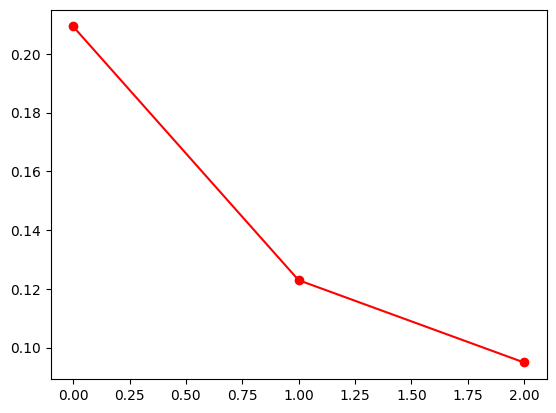

In [4]:
# n_components = min(n_samples, n_features) --> default
pca = PCA(n_components=3) #Reduccion de dimensionalidad a 2 componentes principales
pca.fit(x_train) #Ajustar el modelo PCA con los datos de entrenamiento
# Tamaño de bloque --> batch_size
ipca = IncrementalPCA(n_components=3, batch_size=10) #Reduccion de dimensionalidad a 2 componentes principales
ipca.fit(x_train) #Ajustar el modelo PCA con los datos de entrenamiento
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_, 'ro-', label='PCA')
plt.show()

Se evidencia que las dos primeras componentes aportan casi toda la variabilidad.

In [6]:
# Regresion logistica
logistic = LogisticRegression(solver= 'lbfgs')

dt_train = pca.transform(x_train) #Transformar los datos de entrenamiento
dt_test = pca.transform(x_test) #Transformar los datos de prueba

logistic.fit(dt_train, y_train) #Ajustar el modelo de regresion logistica con los datos de entrenamiento

# Accuracy
print(f"Score PCA: {logistic.score(dt_test, y_test)}") #Evaluar el modelo de regresion logistica con los datos de prueba

dt_train = ipca.transform(x_train) #Transformar los datos de entrenamiento
dt_test = ipca.transform(x_test) #Transformar los datos de prueba

logistic.fit(dt_train, y_train) #Ajustar el modelo de regresion logistica con los datos de entrenamiento

# Accuracy
print(f"Score IPCA: {logistic.score(dt_test, y_test)}") #Evaluar el modelo de regresion logistica con los datos de prueba

Score PCA: 0.7857142857142857
Score IPCA: 0.8051948051948052


### Kernels

Un kernel es una función matemática que toma mediciones que se comportan de manera no lineal y las proyecta en un espacio dimesional más grande donde sean linealmente separables.

*En machine learning, un conjunto de datos es linealmente separable si se puede trazar un hiperplano (una línea recta en 2D, un plano en 3D, etc.) que separe perfectamente los puntos de datos de diferentes clases entre sí. Si no se puede encontrar tal límite lineal, los datos no son linealmente separables.*

![Representación de un Kernel](./images/kernel.png)
![Representación de un Kernel](./images/Tipos-kernels.png)

## Kernel PCA

In [7]:
# Librerias
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.decomposition import KernelPCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [8]:
dt_heart = pd.read_csv("./data/heart.csv")

dt_features = dt_heart.drop(['target'], axis=1) #Eliminar valores nulos
dt_target = dt_heart['target']

dt_features = StandardScaler().fit_transform(dt_features) #Estandarizar los datos
# Dividir entre datos de entrenamiento y datos de prueba
x_train, x_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=42)

kpca = KernelPCA(n_components=4, kernel='poly')
kpca.fit(x_train) #Ajustar el modelo PCA con los datos de entrenamiento

dt_train = kpca.transform(x_train) #Transformar los datos de entrenamiento
dt_test = kpca.transform(x_test) #Transformar los datos de prueba

logistic = LogisticRegression(solver= 'lbfgs')
logistic.fit(dt_train, y_train) #Ajustar el modelo de regresion logistica con los datos de entrenamiento

print(f"Score KPCA: {logistic.score(dt_test, y_test)}") #Evaluar el modelo de regresion logistica con los datos de prueba

Score KPCA: 0.7987012987012987
